In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
df_angle = pd.read_csv('yoga_pose_dataset/sn_salut_angle.csv')
# df_angle.drop('Unnamed: 0', inplace=True, axis=1)


In [26]:
df_angle_test = pd.read_csv('yoga_pose_dataset\yoga_angle_test.csv')
df_angle_test.drop('Unnamed: 0', inplace=True, axis=1)


In [7]:
df_angle["target"].unique()

array(['adho mukha savanasana', 'ashtanga namaskar', 'aswa sanchalnasan',
       'bhujangasana', 'pranamasan', 'urdhva hastasana', 'uttanasana'],
      dtype=object)

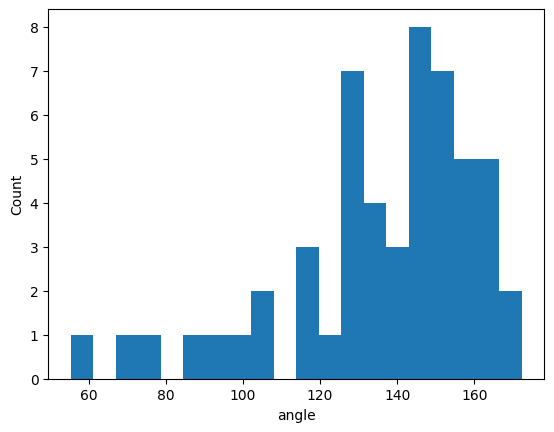

In [8]:
plt.hist(df_angle[df_angle["target"]=="ashtanga namaskar"].left_shoulder, bins=20)
plt.xlabel("angle")
plt.ylabel("Count")
plt.show()

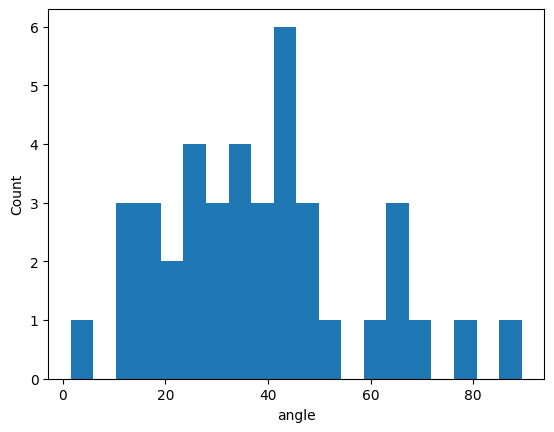

In [14]:
plt.hist(df_angle[df_angle["target"]=="pranamasan"].right_shoulder, bins=20)
plt.xlabel("angle")
plt.ylabel("Count")
plt.show()

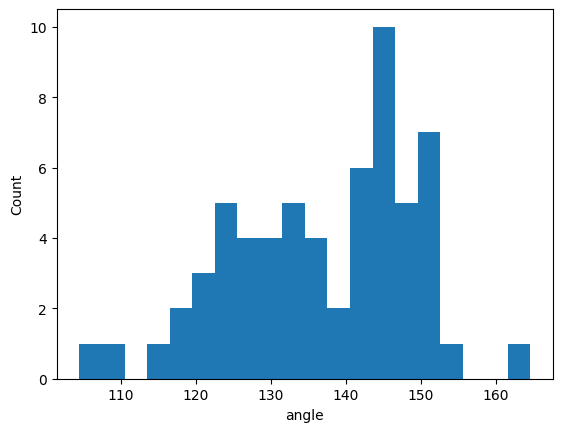

In [10]:
plt.hist(df_angle[df_angle["target"]=="adho mukha savanasana"].left_shoulder, bins=20)
plt.xlabel("angle")
plt.ylabel("Count")
plt.show()

In [12]:
df_angle[df_angle["target"]=="adho mukha savanasana"].describe()

,left_shoulder,right_shoulder,left_elbow,right_elbow,left_leg_waist,right_leg_waist,left_knee,right_knee
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,136.768498,137.537807,102.169148,102.657988,80.865509,81.583837,166.018650,164.262048
std,12.300696,15.045983,26.991084,25.066729,12.748657,14.851918,8.820335,11.904108
min,104.432232,89.362087,58.140076,51.907182,30.465415,54.094555,140.347636,99.907599
25%,128.169624,129.548943,77.656033,86.042966,72.635536,71.987106,161.238597,159.032732
50%,139.473159,137.312073,106.404985,99.876072,81.383702,80.562966,166.533290,166.701699
75%,145.809776,143.353009,117.209484,112.154951,88.754906,87.063588,172.484590,172.561867
max,164.621283,175.773719,168.466971,172.451044,112.536240,156.894212,178.791470,178.023232


In [19]:
df_angle[df_angle["target"]=="pranamasan"].describe()["left_shoulder"]

count     40.000000
mean      73.530887
std       31.243969
min       33.617475
25%       49.173153
50%       60.371433
75%      106.190143
max      124.220258
Name: left_shoulder, dtype: float64

In [3]:
pose_dict= {}
for ps_name in df_angle["target"].unique():
    obj = df_angle[df_angle["target"]==ps_name].describe()
    pose_angle_dict = {}
    for d_angle in df_angle.columns[0:8]:
        obj_a = obj[d_angle]
        pose_angle_dict[d_angle] = [obj_a["mean"], obj_a["std"]]
    pose_dict[ps_name] = pose_angle_dict

In [5]:
import json
with open('pose_angle.json', 'w') as json_file:
    json.dump(pose_dict, json_file)
# json.dump(pose_dict, ) 

In [30]:
def remv_outlier(df):
    df_clean = pd.DataFrame(columns=['left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow', 'left_leg_waist', 'right_leg_waist', 'left_knee', 'right_knee', 'target'])
    for ps_name in df["target"].unique():
        df_temp = df[df["target"]==ps_name]
        for d_angle in df.columns[0:8]:
            t_det = df_temp[d_angle].describe()
            lo_lmt = t_det["mean"] - t_det["std"]
            up_lmt = t_det["mean"] + t_det["std"]
            print(lo_lmt, up_lmt)
            df_temp = df_temp[(df_temp[d_angle]<up_lmt)&(df_temp[d_angle]>lo_lmt)]
        df_clean = pd.concat([df_clean, df_temp])
    return df_clean

In [31]:
df_angle_test = remv_outlier(df_angle_test)

138.65786354705583 153.19279215764848
133.02019889291847 143.49642689527735
104.32887668623125 116.38281674443998
73.28822712617382 83.5311122160226
78.10080036489818 81.32457735682003
73.82772977555159 74.77899894278046
170.98464696533927 177.67717100157313
151.64449686870225 159.77909595739052
123.47024917267754 152.74390848015338
75.10489316512155 98.94605455682878
111.08817513424394 129.6627428651352
105.38169003955238 135.02967022716956
103.29729868601464 120.09060566216863
98.97544008070024 111.30473807133397
41.90715736170574 56.517179271820794
49.63451177690717 51.85127552836658
103.80181827536941 109.00017649925215
21.574313320665226 35.611688488491716
95.1223024988751 102.31067029557259
102.00710840392026 122.0441757123844
134.1107769944537 142.91995915613998
125.88507693060026 127.65664347614111
120.57970763282839 126.6770923658706
109.43356108057756 117.77287404394738
97.40530904457493 122.46452079470534
42.71293984573613 170.44942901630822
116.13628743771525 159.7984607475

In [14]:
df_angle_or = remv_outlier(df_angle)

118.31745404288178 155.21954198657133
118.84158657087089 157.62295721601407
60.26313648578491 134.50969477141913
68.59040048382269 128.79840688120058
61.00192303134969 97.97566665735803
66.21705954467113 92.46778754422705
157.1531799900006 179.69619607356796
155.50249698063047 178.45605359654914
97.1525114395128 174.90314691205924
29.1206886128887 111.49167606121009
63.42964985820218 159.89935139365616
81.9968699905066 156.30102812208867
103.5807139098048 144.85269821344087
109.45685389973912 149.09917444201008
117.37637960563139 147.1707038299132
113.9016022738911 143.65534146708637
86.46789191089916 114.82710074766403
39.36382192467353 86.27004054892876
116.91464525293912 170.763210201088
114.75702435316134 166.16145690386088
42.06964260799712 166.34675809791446
36.906498050171194 170.33840941850016
96.48666442412389 159.05346371404474
79.2658508052634 160.81832449438934
75.51467779361127 130.00380942379294
18.688328656796955 78.83282098496308
99.08753933944993 178.24670302397223
118

In [19]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_angle, test_size=0.2)

In [21]:
train.describe()

,left_shoulder,right_shoulder,left_elbow,right_elbow,left_leg_waist,right_leg_waist,left_knee,right_knee
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,113.455761,89.183955,121.877685,121.436093,109.048069,107.593077,146.624718,145.098388
std,29.193445,44.886726,29.022039,28.562495,44.257365,45.491260,26.813015,25.983289
min,24.840289,1.510472,47.052038,48.073853,10.621470,12.099258,38.011430,18.410559
25%,96.350599,52.556121,103.232509,101.112114,76.589178,73.372066,133.831826,132.399747
50%,114.430948,81.390056,123.536122,122.626330,115.887378,116.174221,155.357125,150.861886
75%,136.362315,131.916413,143.387943,143.002178,144.660536,146.424511,166.409406,163.919199
max,172.292790,176.690796,178.974494,176.864309,178.918605,176.382172,178.791470,178.299478


In [23]:
for ps_name in test["target"].unique():
    print(ps_name, test[test["target"]==ps_name].count())

bhujangasana left_shoulder      18
right_shoulder     18
left_elbow         18
right_elbow        18
left_leg_waist     18
right_leg_waist    18
left_knee          18
right_knee         18
target             18
dtype: int64
adho mukha savanasana left_shoulder      7
right_shoulder     7
left_elbow         7
right_elbow        7
left_leg_waist     7
right_leg_waist    7
left_knee          7
right_knee         7
target             7
dtype: int64
urdhva hastasana left_shoulder      13
right_shoulder     13
left_elbow         13
right_elbow        13
left_leg_waist     13
right_leg_waist    13
left_knee          13
right_knee         13
target             13
dtype: int64
aswa sanchalnasan left_shoulder      15
right_shoulder     15
left_elbow         15
right_elbow        15
left_leg_waist     15
right_leg_waist    15
left_knee          15
right_knee         15
target             15
dtype: int64
uttanasana left_shoulder      8
right_shoulder     8
left_elbow         8
right_elbow        8


In [31]:
def rndm_dataset_genrtor(df):
    df_clean = pd.DataFrame(columns=['left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow', 'left_leg_waist', 'right_leg_waist', 'left_knee', 'right_knee', 'target'])
    
    for ps_name in df["target"].unique():
        dic_ls = {}
        # ls = df[df["target"]==ps_name]
        for d_angle in df.columns[0:8]:
            # ls = list(df[df["target"]==ps_name][d_angle].unique())
            dic_ls[d_angle] = [df[df["target"]==ps_name][d_angle].min(), df[df["target"]==ps_name][d_angle].max(), df[df["target"]==ps_name][d_angle].mean()]
        for i in range(0, 200):
            t_dic = {}
            for d_angle in df.columns[0:8]:
                t_dic[d_angle] = random.triangular(dic_ls[d_angle][0], dic_ls[d_angle][1], dic_ls[d_angle][2])
            t_dic["target"] = ps_name
            # print(t_dic)
            t_df = pd.DataFrame(t_dic, index=[0])
            df_clean = pd.concat([df_clean, t_df], ignore_index=True)
            df_clean.reset_index()
    df_clean = pd.concat([df_clean, df], ignore_index=True)
    df_clean.reset_index()
    return df_clean


In [32]:
train, test = train_test_split(df_angle, test_size=0.2)
train_df = rndm_dataset_genrtor(df_angle)

In [33]:
df_angle_test[df_angle_test["target"]=="tree"] = df_angle

,left_shoulder,right_shoulder,left_elbow,right_elbow,left_leg_waist,right_leg_waist,left_knee,right_knee,target
205,105.078293,161.658145,124.338563,128.03922,157.598773,97.498436,91.088457,18.297621,tree
259,105.078293,161.658145,124.338563,128.03922,157.598773,97.498436,91.088457,18.297621,tree


In [38]:
test_df = rndm_dataset_genrtor(df_angle_test)

C:\Users\athar\AppData\Local\Programs\Python\Python39\lib\random.py:526: RuntimeWarning: invalid value encountered in double_scalars
  c = 0.5 if mode is None else (mode - low) / (high - low)
C:\Users\athar\AppData\Local\Programs\Python\Python39\lib\random.py:526: RuntimeWarning: invalid value encountered in double_scalars
  c = 0.5 if mode is None else (mode - low) / (high - low)
C:\Users\athar\AppData\Local\Programs\Python\Python39\lib\random.py:526: RuntimeWarning: invalid value encountered in double_scalars
  c = 0.5 if mode is None else (mode - low) / (high - low)
C:\Users\athar\AppData\Local\Programs\Python\Python39\lib\random.py:526: RuntimeWarning: invalid value encountered in double_scalars
  c = 0.5 if mode is None else (mode - low) / (high - low)
C:\Users\athar\AppData\Local\Programs\Python\Python39\lib\random.py:526: RuntimeWarning: invalid value encountered in double_scalars
  c = 0.5 if mode is None else (mode - low) / (high - low)
C:\Users\athar\AppData\Local\Programs\Py

In [35]:
train_df[train_df["target"]=="goddess"].describe()

,left_shoulder,right_shoulder,left_elbow,right_elbow,left_leg_waist,right_leg_waist,left_knee,right_knee
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,114.075870,72.425355,112.500772,115.635158,94.019560,93.339012,44.476390,46.487304
std,10.295173,17.525661,7.711019,8.076435,8.611429,7.218888,3.392731,1.744358
min,91.577772,35.757664,94.507938,99.096520,72.480534,77.370488,36.639725,42.270413
25%,106.248688,59.717027,107.318318,110.446448,87.674768,87.963376,42.064594,45.378268
50%,113.245419,71.479244,111.473625,115.026419,93.964851,93.336204,44.579031,46.492695
75%,121.006610,86.294573,118.805706,120.921641,100.567904,99.050213,46.954444,47.701501
max,141.075045,114.654733,131.466536,134.150725,114.948393,109.574677,51.631394,50.250044


In [39]:
test_df[test_df["target"]=="downdog"].describe()

,left_shoulder,right_shoulder,left_elbow,right_elbow,left_leg_waist,right_leg_waist,left_knee,right_knee
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,147.541485,137.903683,109.873111,72.289181,80.845309,73.545300,175.518354,156.109806
std,2.760161,2.404865,4.509020,3.460742,1.678979,1.198440,1.670303,1.458298
min,140.694805,132.634153,98.369600,64.030687,76.369268,70.717319,171.432961,152.653018
25%,145.885952,136.197645,106.487983,70.028807,79.656668,72.619345,174.324877,155.022036
50%,147.694792,137.784591,110.238748,72.394139,81.056604,73.602458,175.655881,156.135915
75%,149.427075,139.446166,113.025653,74.684170,82.076408,74.488304,176.621827,157.120563
max,154.146968,143.712723,119.806391,80.396685,84.440784,76.167173,179.354343,159.234181


In [42]:
test_df.head()

,left_shoulder,right_shoulder,left_elbow,right_elbow,left_leg_waist,right_leg_waist,left_knee,right_knee,target
0,146.075736,139.610725,112.977731,69.707785,78.838894,74.474095,173.391834,156.154922,downdog
1,149.529300,137.264336,113.205515,72.277985,80.823563,74.894486,173.179372,153.752792,downdog
2,149.216723,136.419178,112.522779,71.975276,79.743800,72.424329,176.279003,153.754295,downdog
3,145.911780,132.792414,104.266694,72.725164,82.538844,72.691161,177.018439,153.654194,downdog
4,149.952255,139.859883,111.851458,79.272384,81.652144,71.956069,176.592272,157.179683,downdog


In [25]:
test.to_csv("yoga_pose_dataset/test_csv.csv", index=False)
train.to_csv("yoga_pose_dataset/train_csv.csv", index=False)

In [17]:
df_angle[df_angle["target"]=="downdog"].describe()

,left_shoulder,right_shoulder,left_elbow,right_elbow,left_leg_waist,right_leg_waist,left_knee,right_knee
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,136.850437,139.486230,103.754739,90.054509,76.737537,71.917122,170.510817,159.855590
std,8.295247,5.474785,14.331343,14.373430,3.148891,3.137272,6.192464,4.355036
min,119.334863,129.049527,77.580342,72.085332,70.799532,67.371558,156.323508,152.925996
25%,132.985017,135.694419,89.209181,77.296649,74.209543,69.571094,168.052753,157.067560
50%,138.487894,139.809376,106.773876,84.563563,77.309803,72.177867,173.311947,158.255475
75%,142.644808,143.491724,112.563933,98.652193,79.355962,74.664313,174.960804,164.148964
max,148.914399,148.852109,122.643618,113.790340,82.050032,77.979846,177.013003,166.382213


In [55]:
df_angle.describe()

,left_shoulder,right_shoulder,left_elbow,right_elbow,left_leg_waist,right_leg_waist,left_knee,right_knee
count,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000,2157.000000
mean,123.147718,104.154542,124.527627,125.572023,110.961123,108.196630,109.130947,103.976521
std,24.802495,48.214793,28.191785,28.364686,34.155357,33.592565,45.472954,46.221577
min,42.241422,4.194621,38.408237,32.330658,5.074154,8.612716,0.673519,10.751951
25%,103.880837,66.586022,104.826430,106.738040,84.472923,80.805884,69.126907,61.592743
50%,123.160525,110.506447,125.665057,127.631082,112.789992,109.982118,119.649579,115.434505
75%,143.110630,145.042590,146.681986,147.959110,136.695830,133.389414,144.898055,141.138079
max,178.956737,178.726167,177.711279,178.529315,179.710870,178.786535,179.230997,179.609647


In [54]:
df_angle.to_csv("yoga_pose_dataset/yoga_angle_rm_outlir.csv")

In [34]:
test_det = df_angle[df_angle["target"]=="downdog"]["left_shoulder"].describe()
print(type(test_det))
test_det

<class 'pandas.core.series.Series'>


count    348.000000
mean     132.419034
std       17.801216
min       40.756742
25%      123.589230
50%      136.595975
75%      144.336852
max      166.615126
Name: left_shoulder, dtype: float64

In [33]:
df_angle[df_angle["target"]=="downdog"].right_shoulder.describe()

count    348.000000
mean     129.357975
std       23.572142
min        7.513446
25%      126.299658
50%      134.524346
75%      140.628343
max      173.894784
Name: right_shoulder, dtype: float64

In [31]:
print(test_det["mean"], test_det["std"])
lo_lmt = test_det["mean"] - 3*test_det["std"]
up_lmt = test_det["mean"] + 3*test_det["std"]
print(up_lmt, lo_lmt)

132.41903433958782 17.801216497435163
185.8226838318933 79.01538484728233


In [25]:
df_downdog = df_angle[df_angle["target"]=="downdog"]
df_downdog.head()

,left_shoulder,right_shoulder,left_elbow,right_elbow,left_leg_waist,right_leg_waist,left_knee,right_knee,target
0,143.176041,147.824399,114.986452,93.792486,71.981782,64.813235,173.639815,156.346628,downdog
1,139.288780,145.156636,131.170793,99.637033,75.943327,70.144649,168.635117,155.601473,downdog
2,116.616909,173.894784,91.117305,164.415748,83.022949,69.420660,167.002745,159.490200,downdog
3,145.895066,123.270036,132.198656,53.619093,100.751834,82.769971,172.951286,167.115766,downdog
4,144.398010,140.334221,57.816453,148.502738,83.287876,93.894641,164.633229,162.323169,downdog


In [32]:
df_downdog[(df_downdog.left_shoulder<lo_lmt)]

,left_shoulder,right_shoulder,left_elbow,right_elbow,left_leg_waist,right_leg_waist,left_knee,right_knee,target
53,71.362843,112.606354,135.639645,128.406539,121.593990,121.086762,148.145129,113.020242,downdog
54,74.484423,73.886192,152.312375,145.389224,158.506369,171.618361,174.198543,175.742500,downdog
65,68.124418,163.630207,169.529264,155.467331,66.149837,64.231126,165.320081,167.288754,downdog
125,56.584361,95.701371,156.918999,155.212005,78.271815,101.267975,150.475993,155.526989,downdog
179,40.756742,7.513446,149.006196,139.309657,162.038817,161.565824,140.485637,176.482537,downdog
